In [ ]:
pwd

In [ ]:
import sys
print(sys.executable)

In [ ]:
# https://sourceforge.net/projects/dclib/ - File to download

In [ ]:
# Go to command prompt and do the below changes

# change to the path - C:\Users\Administrator\Downloads\dlib-19.20
# run python setup.py install

In [ ]:
# pip install dlib==19.8.1

In [ ]:
# pip uninstall dlib

In [ ]:
# conda install -c conda-forge dlib=19.17

In [1]:
import cv2
import dlib
import numpy 

PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector = dlib.get_frontal_face_detector()

In [2]:
class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass

In [3]:
def get_landmarks(im):
    rects = detector(im, 1)

    if len(rects) > 1:
        raise TooManyFaces
    if len(rects) == 0:
        raise NoFaces

    return numpy.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im, str(idx), pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,
                    
                    color=(0, 0, 255))
        cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im

In [4]:
image = cv2.imread('dhoni.jpg')
landmarks = get_landmarks(image)
image_with_landmarks = annotate_landmarks(image, landmarks)



In [5]:
import matplotlib.pyplot as plt

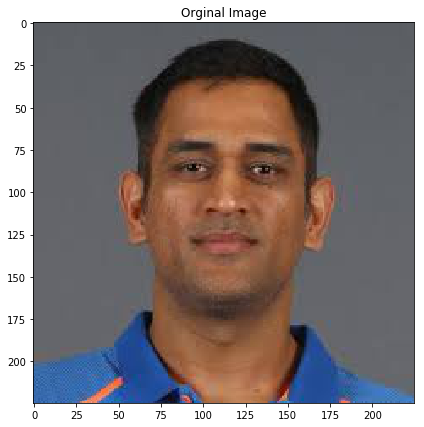

In [13]:
plt.figure(figsize = (15,7))
plt.title('Orginal Image')
plt.imshow( plt.imread( 'dhoni.jpg' ) )

In [7]:

cv2.imwrite('dhoni_image_with_landmarks.jpg',image_with_landmarks)


True

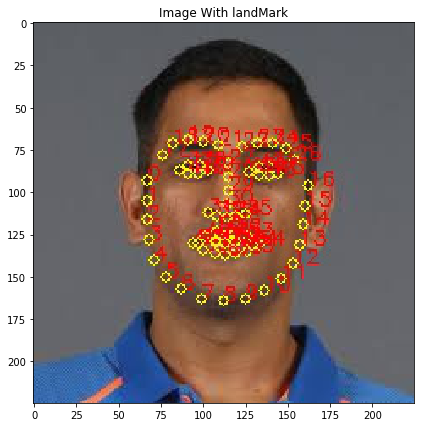

In [15]:
plt.figure(figsize = (15,7))
plt.title('Image With landMark')
plt.imshow( plt.imread( 'dhoni_image_with_landmarks.jpg' ) )

In [12]:
landmarks.shape

(68, 2)

# Live Video

In [4]:


def get_landmarks(im):
    
    rects = detector(im, 1)

    return numpy.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im, str(idx), pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.1,
                    
                    color=(0, 0, 255))
        cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im

In [ ]:
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector = dlib.get_frontal_face_detector()


In [1]:

cap = cv2.VideoCapture(0)

    
while True:
    
    ret , frame = cap.read()
    
    landmarks = get_landmarks(frame)
    
    frame = annotate_landmarks(frame, landmarks)
    
    cv2.imshow( 'Live Detection' , frame )
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
cap.release()
cv2.destroyAllWindows()